In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
covid_cases_path = "Covid_cases.csv"
city_crime_path = "city_crime.csv"
covid_cases_daily_path = "covid_cases_daily.csv"
city_crime_daily_path = "city_crime_daily.csv"

# Read the mouse data and the study results
covid_cases_df = pd.read_csv(covid_cases_path)
city_crime_df = pd.read_csv(city_crime_path)
covid_cases_daily_df = pd.read_csv(covid_cases_daily_path)
city_crime_daily_df = pd.read_csv(city_crime_daily_path)
#print data headers
covid_cases_daily_df.head()


,Date,City,Cum_Open_Cases,Change in New Cases,% Change in New Cases
0,1-Mar,Denver,0,0,0.0%
1,2-Mar,Denver,0,0,0.0%
2,3-Mar,Denver,0,0,0.0%
3,4-Mar,Denver,0,0,0.0%
4,5-Mar,Denver,0,0,0.0%


In [2]:
# print data headers for city crime
city_crime_df.head()


,Month,City,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
0,Jan-19,Philadelphia,9023,2995,NaN,NaN
1,Feb-19,Philadelphia,8056,2819,NaN,NaN
2,Mar-19,Philadelphia,8926,3269,NaN,NaN
3,Apr-19,Philadelphia,9799,3530,NaN,NaN
4,May-19,Philadelphia,10676,3782,NaN,NaN


In [3]:
#Washington DC
DC_df = city_crime_df.loc[city_crime_df["City"]=="Washington DC"]
DC_df

,Month,City,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
90,Jan-19,Washington DC,2412,328,NaN,NaN
91,Feb-19,Washington DC,2060,252,NaN,NaN
92,Mar-19,Washington DC,2180,258,NaN,NaN
93,Apr-19,Washington DC,2248,321,NaN,NaN
94,May-19,Washington DC,2325,391,NaN,NaN
95,Jun-19,Washington DC,2461,400,NaN,NaN
96,Jul-19,Washington DC,2651,388,NaN,NaN
97,Aug-19,Washington DC,2698,394,NaN,NaN
98,Sep-19,Washington DC,2668,398,NaN,NaN
99,Oct-19,Washington DC,2843,381,NaN,NaN


Text(0, 0.5, 'Number of Non-Violent Crimes')

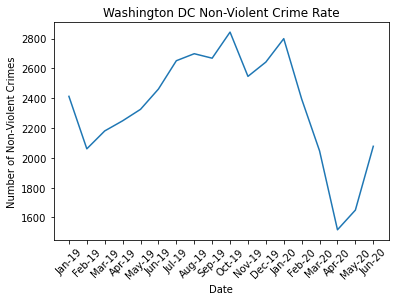

In [4]:
# Plot two variables
plt.plot(DC_df['Month'], DC_df['Non-Violent'])
plt.xticks(rotation=45)
plt.title('Washington DC Non-Violent Crime Rate')
plt.xlabel("Date")
plt.ylabel("Number of Non-Violent Crimes")

Text(0, 0.5, 'Number of Violent Crimes')

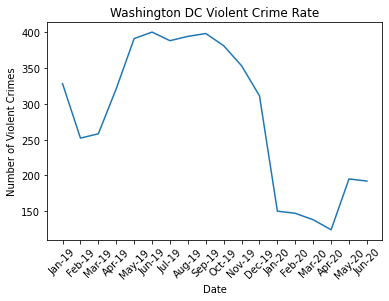

In [5]:
plt.plot(DC_df['Month'], DC_df['Violent'])
plt.xticks(rotation=45)
plt.title('Washington DC Violent Crime Rate')
plt.xlabel("Date")
plt.ylabel("Number of Violent Crimes")

([<matplotlib.patches.Wedge at 0x7fa33956fa30>,
 [Text(1.0370803709430014, 0.3666937471579335, 'Violent'),
  Text(-1.0370803881091737, -0.36669369860869694, 'Non-Violent')],
 [Text(0.5656802023325462, 0.20001477117705463, '10.8%'),
  Text(-0.5656802116959129, -0.20001474469565286, '89.2%')])

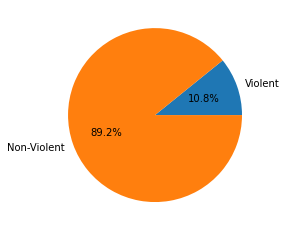

In [6]:
# Plot pie graph for Philadelphia
violent_count = DC_df['Violent'].sum()
non_violent_count = DC_df['Non-Violent'].sum()
DC_crime_type = [violent_count,non_violent_count]
labels = ["Violent", "Non-Violent"]
plt.pie(DC_crime_type,labels=labels,autopct='%1.1f%%')


In [7]:
print(non_violent_count)
print(violent_count)

42216
5121


In [8]:
# Merge data inner on Month
merged_df = pd.merge(covid_cases_df, city_crime_df)
merged_df

,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
0,Jan-19,Denver,0,6935,630,NaN,NaN
1,Feb-19,Denver,0,6076,499,NaN,NaN
2,Mar-19,Denver,0,6473,585,NaN,NaN
3,Apr-19,Denver,0,6558,656,NaN,NaN
4,May-19,Denver,0,6840,710,NaN,NaN
...,...,...,...,...,...,...,...
103,Feb-20,Seattle,5,4337,964,0.150093,0.072303
104,Mar-20,Seattle,23455,5544,997,0.183351,-0.105027
105,Apr-20,Seattle,138708,5166,941,0.090564,-0.123836
106,May-20,Seattle,228112,10521,1036,1.306731,-0.142384


In [9]:
merged_df_DC = merged_df.loc[merged_df["City"]=="Washington DC"]
merged_df_DC

,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
18,Jan-19,Washington DC,0,2412,328,NaN,NaN
19,Feb-19,Washington DC,0,2060,252,NaN,NaN
20,Mar-19,Washington DC,0,2180,258,NaN,NaN
21,Apr-19,Washington DC,0,2248,321,NaN,NaN
22,May-19,Washington DC,0,2325,391,NaN,NaN
23,Jun-19,Washington DC,0,2461,400,NaN,NaN
24,Jul-19,Washington DC,0,2651,388,NaN,NaN
25,Aug-19,Washington DC,0,2698,394,NaN,NaN
26,Sep-19,Washington DC,0,2668,398,NaN,NaN
27,Oct-19,Washington DC,0,2843,381,NaN,NaN


In [10]:
merged_df_DC.dropna(how="any")


,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
30,Jan-20,Washington DC,0,2799,150,0.160448,-0.542683
31,Feb-20,Washington DC,0,2394,147,0.162136,-0.416667
32,Mar-20,Washington DC,2923,2046,138,-0.061468,-0.465116
33,Apr-20,Washington DC,70950,1517,124,-0.325178,-0.613707
34,May-20,Washington DC,215106,1649,195,-0.290753,-0.501279
35,Jun-20,Washington DC,291828,2077,192,-0.156034,-0.520000


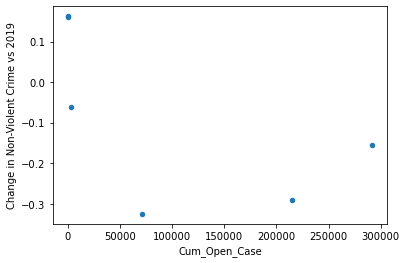

In [11]:
merged_df_DC.plot(kind="scatter", x="Cum_Open_Case", y="Change in Non-Violent Crime vs 2019")

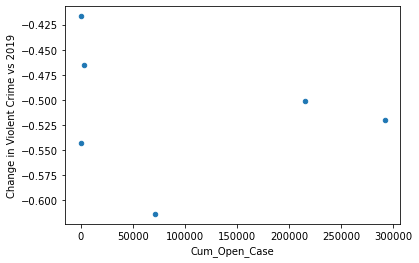

In [12]:
merged_df_DC.plot(kind="scatter", x="Cum_Open_Case", y="Change in Violent Crime vs 2019")

In [13]:
SF_df = city_crime_df.loc[city_crime_df["City"]=="San Francisco"]
SF_df

,Month,City,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
54,Jan-19,San Francisco,6883,873,NaN,NaN
55,Feb-19,San Francisco,6277,711,NaN,NaN
56,Mar-19,San Francisco,6671,964,NaN,NaN
57,Apr-19,San Francisco,6845,897,NaN,NaN
58,May-19,San Francisco,6890,971,NaN,NaN
59,Jun-19,San Francisco,6533,974,NaN,NaN
60,Jul-19,San Francisco,6955,958,NaN,NaN
61,Aug-19,San Francisco,7225,1050,NaN,NaN
62,Sep-19,San Francisco,6884,946,NaN,NaN
63,Oct-19,San Francisco,7054,951,NaN,NaN


Text(0, 0.5, 'Number of Non-Violent Crimes')

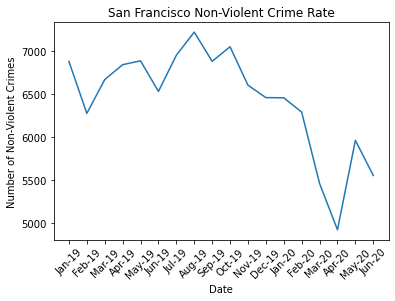

In [14]:
plt.plot(SF_df['Month'], SF_df['Non-Violent'])
plt.xticks(rotation=45)
plt.title('San Francisco Non-Violent Crime Rate')
plt.xlabel("Date")
plt.ylabel("Number of Non-Violent Crimes")

Text(0, 0.5, 'Number of Violent Crimes')

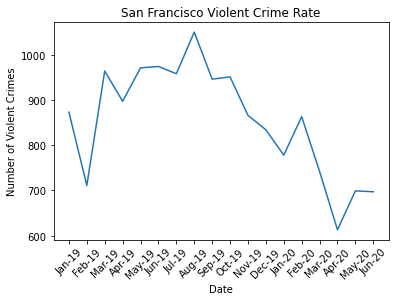

In [15]:
plt.plot(SF_df['Month'], SF_df['Violent'])
plt.xticks(rotation=45)
plt.title('San Francisco Violent Crime Rate')
plt.xlabel("Date")
plt.ylabel("Number of Violent Crimes")

([<matplotlib.patches.Wedge at 0x7fa339af6310>,
 [Text(1.026309387272304, 0.3958396665276844, 'Violent'),
  Text(-1.0263093502111151, -0.3958397626177023, 'Non-Violent')],
 [Text(0.5598051203303476, 0.21591254537873691, '11.7%'),
  Text(-0.5598051001151536, -0.21591259779147395, '88.3%')])

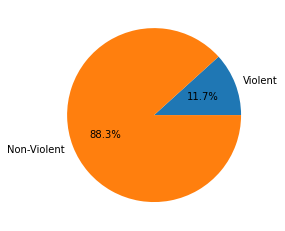

In [16]:
violent_count = SF_df['Violent'].sum()
non_violent_count = SF_df['Non-Violent'].sum()
SF_crime_type = [violent_count,non_violent_count]
labels = ["Violent", "Non-Violent"]
plt.pie(SF_crime_type,labels=labels,autopct='%1.1f%%')

In [17]:
print(non_violent_count)
print(violent_count)

115931
15387


In [18]:
merged_df = pd.merge(covid_cases_df, city_crime_df)
merged_df

,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
0,Jan-19,Denver,0,6935,630,NaN,NaN
1,Feb-19,Denver,0,6076,499,NaN,NaN
2,Mar-19,Denver,0,6473,585,NaN,NaN
3,Apr-19,Denver,0,6558,656,NaN,NaN
4,May-19,Denver,0,6840,710,NaN,NaN
...,...,...,...,...,...,...,...
103,Feb-20,Seattle,5,4337,964,0.150093,0.072303
104,Mar-20,Seattle,23455,5544,997,0.183351,-0.105027
105,Apr-20,Seattle,138708,5166,941,0.090564,-0.123836
106,May-20,Seattle,228112,10521,1036,1.306731,-0.142384


In [19]:
merged_df_SF = merged_df.loc[merged_df["City"]=="San Francisco"]
merged_df_SF

,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
72,Jan-19,San Francisco,0,6883,873,NaN,NaN
73,Feb-19,San Francisco,0,6277,711,NaN,NaN
74,Mar-19,San Francisco,0,6671,964,NaN,NaN
75,Apr-19,San Francisco,0,6845,897,NaN,NaN
76,May-19,San Francisco,0,6890,971,NaN,NaN
77,Jun-19,San Francisco,0,6533,974,NaN,NaN
78,Jul-19,San Francisco,0,6955,958,NaN,NaN
79,Aug-19,San Francisco,0,7225,1050,NaN,NaN
80,Sep-19,San Francisco,0,6884,946,NaN,NaN
81,Oct-19,San Francisco,0,7054,951,NaN,NaN


In [20]:
merged_df_SF.dropna(how="any")

,Month,City,Cum_Open_Case,Non-Violent,Violent,Change in Non-Violent Crime vs 2019,Change in Violent Crime vs 2019
84,Jan-20,San Francisco,0,6459,778,-0.061601,-0.108820
85,Feb-20,San Francisco,62,6292,863,0.002390,0.213783
86,Mar-20,San Francisco,3096,5460,742,-0.181532,-0.230290
87,Apr-20,San Francisco,29980,4920,613,-0.281227,-0.316611
88,May-20,San Francisco,64550,5963,699,-0.134543,-0.280124
89,Jun-20,San Francisco,90185,5553,697,-0.150008,-0.284394


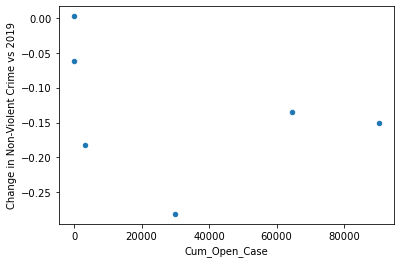

In [21]:
merged_df_SF.plot(kind="scatter", x="Cum_Open_Case", y="Change in Non-Violent Crime vs 2019")


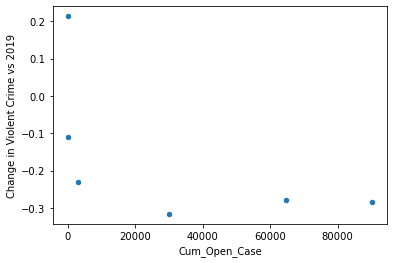

In [22]:
merged_df_SF.plot(kind="scatter", x="Cum_Open_Case", y="Change in Violent Crime vs 2019")

In [23]:
Combined_DC_file = "Combined_DC.csv"
Combined_DC_df = pd.read_csv(Combined_DC_file)

In [24]:
Combined_DC_df.head()
Combined_DC_df = Combined_DC_df.dropna()
Combined_DC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48826 entries, 0 to 48825
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 48826 non-null  object
 1   Date                 48826 non-null  object
 2   month                48826 non-null  int64 
 3   day                  48826 non-null  int64 
 4   year                 48826 non-null  int64 
 5   Date.1               48826 non-null  object
 6   OFFENSE              48826 non-null  object
 7   Violent/Non-Violent  48826 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.4+ MB


In [25]:
Combined_DC_df["Date"] = pd.to_datetime(Combined_DC_df["Date"])
Combined_DC_df["Year"] = pd.DatetimeIndex(Combined_DC_df["Date"]).year
Combined_DC_df["Month"] = pd.DatetimeIndex(Combined_DC_df["Date"]).month
Combined_DC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48826 entries, 0 to 48825
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 48826 non-null  object        
 1   Date                 48826 non-null  datetime64[ns]
 2   month                48826 non-null  int64         
 3   day                  48826 non-null  int64         
 4   year                 48826 non-null  int64         
 5   Date.1               48826 non-null  object        
 6   OFFENSE              48826 non-null  object        
 7   Violent/Non-Violent  48826 non-null  object        
 8   Year                 48826 non-null  int64         
 9   Month                48826 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 4.1+ MB


In [26]:
Combined_DC_df["OFFENSE"].value_counts()
DC_clean_df = Combined_DC_df.loc[Combined_DC_df["OFFENSE"] != "traffic-accident"]
DC_clean_df["OFFENSE"].value_counts()
DC_clean_df.head()

,City,Date,month,day,year,Date.1,OFFENSE,Violent/Non-Violent,Year,Month
0,Washington DC,2019-01-01,1,1,2019,19-Jan,HOMICIDE,Violent,2019,1
1,Washington DC,2019-01-01,1,1,2019,19-Jan,THEFT F/AUTO,Non-Violent,2019,1
2,Washington DC,2019-01-01,1,1,2019,19-Jan,THEFT F/AUTO,Non-Violent,2019,1
3,Washington DC,2019-01-01,1,1,2019,19-Jan,THEFT F/AUTO,Non-Violent,2019,1
4,Washington DC,2019-01-01,1,1,2019,19-Jan,THEFT/OTHER,Non-Violent,2019,1


In [27]:
DC_offense_df = DC_clean_df.groupby("OFFENSE").count()
DC_offense_df = DC_offense_df.sort_values("Date", ascending=False)
DC_offense_df.head(10)

,City,Date,month,day,year,Date.1,Violent/Non-Violent,Year,Month
OFFENSE,,,,,,,,,
THEFT/OTHER,21576,21576,21576,21576,21576,21576,21576,21576,21576
THEFT F/AUTO,15114,15114,15114,15114,15114,15114,15114,15114,15114
MOTOR VEHICLE THEFT,3694,3694,3694,3694,3694,3694,3694,3694,3694
ROBBERY,3192,3192,3192,3192,3192,3192,3192,3192,3192
ASSAULT W/DANGEROUS WEAPON,2474,2474,2474,2474,2474,2474,2474,2474,2474
BURGLARY,2191,2191,2191,2191,2191,2191,2191,2191,2191
SEX ABUSE,293,293,293,293,293,293,293,293,293
HOMICIDE,273,273,273,273,273,273,273,273,273
ARSON,19,19,19,19,19,19,19,19,19


In [28]:
DC_crime_summary_df = DC_clean_df.groupby("OFFENSE").count()
DC_crime_summary_df = DC_crime_summary_df.sort_values(by=["Violent/Non-Violent"], ascending=False)
DC_crime_summary_df = DC_crime_summary_df["Violent/Non-Violent"]

pd.DataFrame({"# Reported Offenses": DC_crime_summary_df})

,# Reported Offenses
OFFENSE,
THEFT/OTHER,21576
THEFT F/AUTO,15114
MOTOR VEHICLE THEFT,3694
ROBBERY,3192
ASSAULT W/DANGEROUS WEAPON,2474
BURGLARY,2191
SEX ABUSE,293
HOMICIDE,273
ARSON,19


In [29]:
# Pie chart data

# Violent vs. Non_Violent Crime
violent_crimes = DC_clean_df["Violent/Non-Violent"].loc[DC_clean_df["Violent/Non-Violent"] == "Violent"].count()
non_violent_crimes = DC_clean_df["Violent/Non-Violent"].loc[DC_clean_df["Violent/Non-Violent"] == "Non-Violent"].count()

# Top 10 Denver Crime dataframes
Theft_df = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "THEFT/OTHER"]
Theft_F_auto = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "THEFT F/AUTO"]
Motor_theft_df = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "MOTOR VEHICLE THEFT"]
Robbery_df = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "ROBBERY"]
Assult_df = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "ASSAULT W/DANGEROUS WEAPON"]
sex_df = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "SEX ABUSE"]
Burg_df = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "BURGLARY"]
Homicide_df = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "HOMICIDE"]
Arson_df = DC_clean_df.loc[DC_clean_df["OFFENSE"] == "ARSON"]


# Top 10 Crime data for pie chart
Total = DC_clean_df["OFFENSE"].count()
theft = Theft_df["OFFENSE"].count()
Theft_f_auto = Theft_F_auto["OFFENSE"].count()
Motor_theft = Motor_theft_df["OFFENSE"].count()
robbery = Robbery_df["OFFENSE"].count()
Assult = Assult_df["OFFENSE"].count()
Sex_abuse = sex_df["OFFENSE"].count()
Burg = Burg_df["OFFENSE"].count()
Homicide = Homicide_df["OFFENSE"].count()
Arson = Arson_df["OFFENSE"].count()

OtherOther = (Total - theft - Theft_f_auto - Motor_theft - robbery - Assult - Sex_abuse - Burg - 
              Homicide - Arson)

print(non_violent_crimes, violent_crimes)
print(theft , Theft_f_auto , Motor_theft , robbery , Assult , Sex_abuse , Burg ,
              Homicide , Arson)


OtherOther
Total

45767 3059
21576 15114 3694 3192 2474 293 2191 273 19


48826

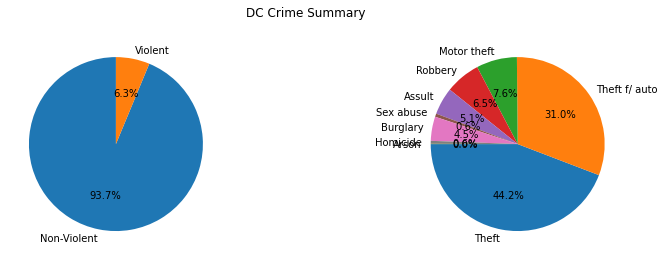

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("DC Crime Summary")

# First Plot
values1 = [non_violent_crimes, violent_crimes]
labels1 = ["Non-Violent", "Violent"]
ax1.pie(values1, labels=labels1, autopct="%1.1f%%", shadow=False, startangle=90)

# Second Plot
values2 = [theft , Theft_f_auto , Motor_theft , robbery , Assult , Sex_abuse , Burg ,
              Homicide , Arson]
labels2 = ["Theft" , "Theft f/ auto" , "Motor theft" , "Robbery" , "Assult" , "Sex abuse" , "Burglary" ,
              "Homicide" , "Arson"]
ax2.pie(values2, labels=labels2, autopct="%1.1f%%", shadow=False, startangle=180)

# Plot
plt.subplots_adjust(wspace=.5)
#plt.savefig("Output Folder/denverpie.png", dpi=300)   
plt.show()

In [31]:
# Group data into Violent / Non-violent categories, trends by month 
dc_trend_df = DC_clean_df.groupby(["Violent/Non-Violent", "Year", "Month"]).count()

# dtrend_df = dtrend_df.sort_values(by=["Year", "Month"], ascending=True)dddd
dc_trend_df.head()

City  Date  month   day  year  Date.1  OFFENSE
Violent/Non-Violent Year Month                                                
Non-Violent         2019 1      2579  2579   2579  2579  2579    2579     2579
                         2      2185  2185   2185  2185  2185    2185     2185
                         3      2321  2321   2321  2321  2321    2321     2321
                         4      2391  2391   2391  2391  2391    2391     2391
                         5      2511  2511   2511  2511  2511    2511     2511

In [32]:
nonviolent_df = dc_trend_df.loc["Non-Violent"]
nonviolent_df = nonviolent_df.sort_values(by=["Year", "Month"], ascending=True)

# Violent data
violent_df = dc_trend_df.loc["Violent"]
violent_df = violent_df.sort_values(by=["Year", "Month"], ascending=True)

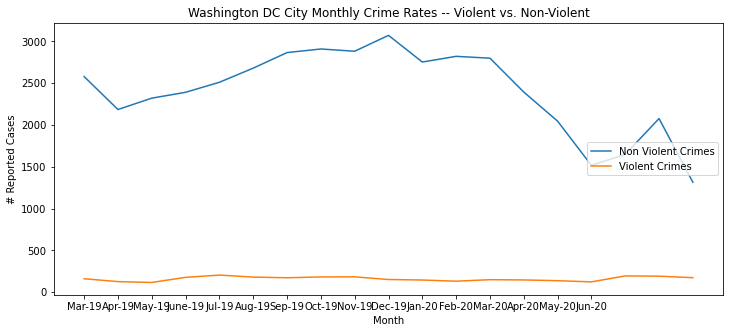

In [33]:
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
plt.title("Washington DC City Monthly Crime Rates -- Violent vs. Non-Violent")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
plt.plot(list(nonviolent_df["OFFENSE"]), label="Non Violent Crimes")
plt.plot(list(violent_df["OFFENSE"]), label="Violent Crimes")
plt.legend(loc="center right")
#plt.savefig("Output Folder/dentrend.png", dpi=300) 
plt.show()

In [34]:
# Summary look at Violent crimes:
DC_VioSum_df = DC_clean_df.loc[Combined_DC_df["Violent/Non-Violent"] == "Violent"]
#DVioSum_df.groupby("Offense").count()
DC_VioSum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3059 entries, 0 to 48825
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 3059 non-null   object        
 1   Date                 3059 non-null   datetime64[ns]
 2   month                3059 non-null   int64         
 3   day                  3059 non-null   int64         
 4   year                 3059 non-null   int64         
 5   Date.1               3059 non-null   object        
 6   OFFENSE              3059 non-null   object        
 7   Violent/Non-Violent  3059 non-null   object        
 8   Year                 3059 non-null   int64         
 9   Month                3059 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 262.9+ KB


In [35]:
# Violent crime trends
VTrend_df = DC_VioSum_df.groupby(["OFFENSE", "Year", "Month"]).count()
VTrend_df.head()

City  Date  month  day  year  Date.1  Violent/Non-Violent
OFFENSE Year Month                                                           
ARSON   2019 4         2     2      2    2     2       2                    2
             5         4     4      4    4     4       4                    4
             6         1     1      1    1     1       1                    1
             8         1     1      1    1     1       1                    1
        2020 1         2     2      2    2     2       2                    2

In [36]:
Arson_df = VTrend_df.loc["ARSON"]
Assault_df = VTrend_df.loc["ASSAULT W/DANGEROUS WEAPON"]
SexualAssault_df = VTrend_df.loc["SEX ABUSE"]
Murder_df = VTrend_df.loc["HOMICIDE"]

Arson = Arson_df["Violent/Non-Violent"]
Assault = Assault_df["Violent/Non-Violent"]
SexAssault = SexualAssault_df["Violent/Non-Violent"]
Murder = Murder_df["Violent/Non-Violent"]

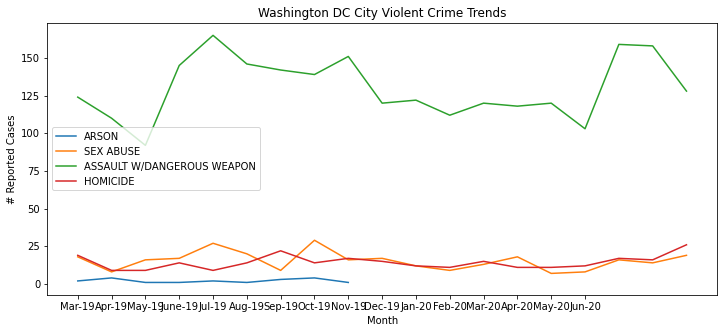

In [37]:
# Plot violent crime trends
# Step 1: Configure chart, xticks, and labels/titles
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
plt.title("Washington DC City Violent Crime Trends")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
plt.plot(list(Arson), label="ARSON")
plt.plot(list(SexAssault), label="SEX ABUSE")
plt.plot(list(Assault), label="ASSAULT W/DANGEROUS WEAPON")
plt.plot(list(Murder), label="HOMICIDE")
plt.legend(loc="center left")
#plt.savefig("Output Folder/denviolent.png", dpi=300) 
plt.show()

In [38]:
#San Francisc
SF_Combined_file = "SanFrancisco2019_2020.csv"
SF_Combined_df = pd.read_csv(SF_Combined_file)

In [39]:
# Evaluate data, drop na
SF_Combined_df.head()
SF_Combined_df = SF_Combined_df.dropna()
SF_Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232364 entries, 0 to 367612
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   City                 232364 non-null  object
 1   Incident Date        232364 non-null  object
 2   Day                  232364 non-null  int64 
 3   Month                232364 non-null  int64 
 4   Year                 232364 non-null  int64 
 5   Incident Date.1      232364 non-null  object
 6   Incident Category    232364 non-null  object
 7   violent.non-violent  232364 non-null  object
dtypes: int64(3), object(5)
memory usage: 16.0+ MB


In [40]:
# Convert reported data to pandas datetime64 type and use DatetimeIndex to add year and month data
# NOTE:  First convert date from an object to datetime64 use info() method to confirm panda data type for Reporte Dates
SF_Combined_df["Incident Date"] = pd.to_datetime(SF_Combined_df["Incident Date"])
SF_Combined_df["Year"] = pd.DatetimeIndex(SF_Combined_df["Incident Date"]).year
SF_Combined_df["Month"] = pd.DatetimeIndex(SF_Combined_df["Incident Date"]).month
SF_Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232364 entries, 0 to 367612
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   City                 232364 non-null  object        
 1   Incident Date        232364 non-null  datetime64[ns]
 2   Day                  232364 non-null  int64         
 3   Month                232364 non-null  int64         
 4   Year                 232364 non-null  int64         
 5   Incident Date.1      232364 non-null  object        
 6   Incident Category    232364 non-null  object        
 7   violent.non-violent  232364 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 16.0+ MB


In [41]:
# Review offense types and clean data (remove traffic violations)
SF_Combined_df["Incident Category"].value_counts()
SF_Clean_df = SF_Combined_df.loc[SF_Combined_df["Incident Category"] != "traffic-accident"]
SF_Clean_df["Incident Category"].value_counts()
SF_Clean_df.head()

,City,Incident Date,Day,Month,Year,Incident Date.1,Incident Category,violent.non-violent
0,San Francisco,2019-01-01,1,1,2019,Jan-19,Arson,Violent
1,San Francisco,2019-01-02,2,1,2019,Jan-19,Arson,Violent
2,San Francisco,2019-01-06,6,1,2019,Jan-19,Arson,Violent
3,San Francisco,2019-01-06,6,1,2019,Jan-19,Arson,Violent
4,San Francisco,2019-01-06,6,1,2019,Jan-19,Arson,Violent


In [42]:
# Group data by offense type and organize 
SFoffense_df = SF_Clean_df.groupby("Incident Category").count()
SFoffense_df = SFoffense_df.sort_values("Incident Date", ascending=False)
SFoffense_df.head(10)

,City,Incident Date,Day,Month,Year,Incident Date.1,violent.non-violent
Incident Category,,,,,,,
Other Miscellaneous,27422,27422,27422,27422,27422,27422,27422
Malicious Mischief,22677,22677,22677,22677,22677,22677,22677
Non-Criminal,22603,22603,22603,22603,22603,22603,22603
Assault,21732,21732,21732,21732,21732,21732,21732
Burglary,17858,17858,17858,17858,17858,17858,17858
Motor Vehicle Theft,14462,14462,14462,14462,14462,14462,14462
Warrant,12875,12875,12875,12875,12875,12875,12875
Lost Property,12710,12710,12710,12710,12710,12710,12710
Recovered Vehicle,11402,11402,11402,11402,11402,11402,11402


In [43]:
# Create sunnnary tabel of Denver Crime Statistics
SFcrime_summary_df = SF_Clean_df.groupby("Incident Category").count()
SFcrime_summary_df = SFcrime_summary_df.sort_values(by=["violent.non-violent"], ascending=False)
SFcrime_summary_df = SFcrime_summary_df["violent.non-violent"]

pd.DataFrame({"# Reported Offenses": SFcrime_summary_df})
SFcrime_summary_df.head(10)

Incident Category
Other Miscellaneous    27422
Malicious Mischief     22677
Non-Criminal           22603
Assault                21732
Burglary               17858
Motor Vehicle Theft    14462
Warrant                12875
Lost Property          12710
Recovered Vehicle      11402
Fraud                  10856
Name: violent.non-violent, dtype: int64

In [44]:
# Pie chart data

# Violent vs. Non_Violent Crime
violent_crimes = SF_Clean_df["violent.non-violent"].loc[SF_Clean_df["violent.non-violent"] == "Violent"].count()
non_violent_crimes = SF_Clean_df["violent.non-violent"].loc[SF_Clean_df["violent.non-violent"] == "Non-Violent"].count()

# Top 10 Denver Crime dataframes
Other_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Other Miscellaneous"]
Malicious_Mischief_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Malicious Mischief"]
Warrant_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Warrant"]
Motor_Vehicle_Theft = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Motor Vehicle Theft"]
Lost_Property_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Lost Property"]
Recovered_Vehicle_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Recovered Vehicle"]
Burg_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Burglary"]
Fraud_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Fraud"]
Assault_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Assault"]
Non_Criminal_df = SF_Clean_df.loc[SF_Clean_df["Incident Category"] == "Non-Criminal"]

# Top 10 Crime data for pie chart
Total = SF_Clean_df["Incident Category"].count()
Other = Other_df["Incident Category"].count()
Malicious_Mischief = Malicious_Mischief_df["Incident Category"].count()
Warrent = Warrant_df["Incident Category"].count()
TheftfromMV = Motor_Vehicle_Theft["Incident Category"].count()
lost_property = Lost_Property_df["Incident Category"].count()
recovered = Recovered_Vehicle_df["Incident Category"].count()
Burg = Burg_df["Incident Category"].count()
Fruad = Fraud_df["Incident Category"].count()
Assault =Assault_df["Incident Category"].count()
Non_Criminal = Non_Criminal_df["Incident Category"].count()
OtherOther = (Total - Other - Malicious_Mischief - Warrent - TheftfromMV - lost_property - recovered - Burg - 
              Fruad - Assault - Non_Criminal)

print(non_violent_crimes, violent_crimes)
print(Total, Other, Malicious_Mischief, Warrent, TheftfromMV, lost_property, recovered, Burg,
              Fruad, Assault, Non_Criminal)


OtherOther
Total

205279 27085
232364 27422 22677 12875 14462 12710 11402 17858 10856 21732 22603


232364

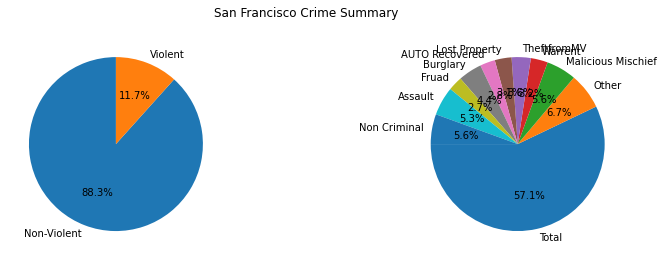

In [45]:
# Plot pie chart of crime types

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("San Francisco Crime Summary")

# First Plot
values1 = [non_violent_crimes, violent_crimes]
labels1 = ["Non-Violent", "Violent"]
ax1.pie(values1, labels=labels1, autopct="%1.1f%%", shadow=False, startangle=90)

# Second Plot
values2 = [Total, Other, Malicious_Mischief, Warrent, TheftfromMV, lost_property, recovered, Burg, Fruad, Assault, Non_Criminal]
labels2 = ["Total", "Other", "Malicious Mischief", "Warrent", "TheftfromMV", "Lost Property", "AUTO Recovered", "Burglary","Fruad", "Assault", "Non Criminal"]
ax2.pie(values2, labels=labels2, autopct="%1.1f%%", shadow=False, startangle=180)

# Plot
plt.subplots_adjust(wspace=.5)
#plt.savefig("Output Folder/denverpie.png", dpi=300)   
plt.show()

In [52]:
# Group data into Violent / Non-violent categories, trends by month 
SFtrend_df = SF_Clean_df.groupby(["violent.non-violent", "Year", "Month"]).count()
# dtrend_df = dtrend_df.sort_values(by=["Year", "Month"], ascending=True)dddd
SFtrend_df.head()

City  Incident Date   Day  Incident Date.1  \
violent.non-violent Year Month                                               
Non-Violent         2018 1      7219           7219  7219             7219   
                         2      6748           6748  6748             6748   
                         3      7169           7169  7169             7169   
                         4      7141           7141  7141             7141   
                         5      7320           7320  7320             7320   

                                Incident Category  
violent.non-violent Year Month                     
Non-Violent         2018 1                   7219  
                         2                   6748  
                         3                   7169  
                         4                   7141  
                         5                   7320

In [53]:
# Break trend data into violent and non-violent data frames and sort by Year and Month
# Nonviolent data
nonviolent_df = SFtrend_df.loc["Non-Violent"]
nonviolent_df = nonviolent_df.sort_values(by=["Year", "Month"], ascending=True)

# Violent data
violent_df = SFtrend_df.loc["Violent"]
violent_df = violent_df.sort_values(by=["Year", "Month"], ascending=True)

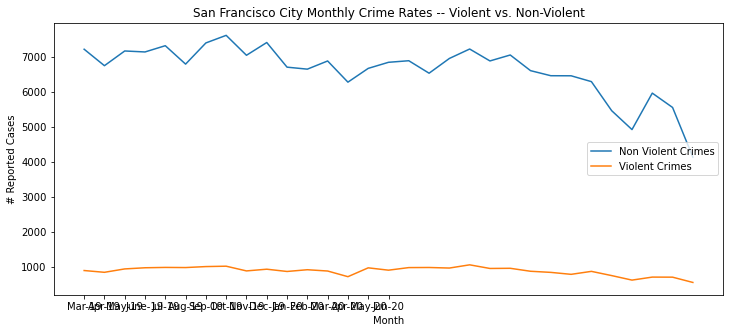

In [54]:
# Generate line plot as figure
# Step 1: Configure chart, xticks, and labels/titles
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
plt.title("San Francisco City Monthly Crime Rates -- Violent vs. Non-Violent")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
plt.plot(list(nonviolent_df["Incident Category"]), label="Non Violent Crimes")
plt.plot(list(violent_df["Incident Category"]), label="Violent Crimes")
plt.legend(loc="center right")
#plt.savefig("Output Folder/dentrend.png", dpi=300) 
plt.show()

In [75]:
SFoffense_df

,City,Incident Date,Day,Month,Year,Incident Date.1,violent.non-violent
Incident Category,,,,,,,
Other Miscellaneous,27422,27422,27422,27422,27422,27422,27422
Malicious Mischief,22677,22677,22677,22677,22677,22677,22677
Non-Criminal,22603,22603,22603,22603,22603,22603,22603
Assault,21732,21732,21732,21732,21732,21732,21732
Burglary,17858,17858,17858,17858,17858,17858,17858
Motor Vehicle Theft,14462,14462,14462,14462,14462,14462,14462
Warrant,12875,12875,12875,12875,12875,12875,12875
Lost Property,12710,12710,12710,12710,12710,12710,12710
Recovered Vehicle,11402,11402,11402,11402,11402,11402,11402


In [69]:
# Summary look at Violent crimes:
SFVioSum_df = SF_Clean_df.loc[SF_Combined_df["violent.non-violent"] == "Violent"]
#DVioSum_df.groupby("Offense").count()
SFVioSum_df.info

<bound method DataFrame.info of                  City Incident Date  Day  Month  Year Incident Date.1  \
0       San Francisco    2019-01-01    1      1  2019          Jan-19   
1       San Francisco    2019-01-02    2      1  2019          Jan-19   
2       San Francisco    2019-01-06    6      1  2019          Jan-19   
3       San Francisco    2019-01-06    6      1  2019          Jan-19   
4       San Francisco    2019-01-06    6      1  2019          Jan-19   
...               ...           ...  ...    ...   ...             ...   
367608  San Francisco    2020-07-22   22      7  2020          Jul-20   
367609  San Francisco    2020-07-22   22      7  2020          Jul-20   
367610  San Francisco    2020-07-22   22      7  2020          Jul-20   
367611  San Francisco    2020-07-22   22      7  2020          Jul-20   
367612  San Francisco    2020-07-23   23      7  2020          Jul-20   

       Incident Category violent.non-violent  
0                  Arson             Violent

In [70]:
# Violent crime trends
VTrend_df = SFVioSum_df.groupby(["Incident Category", "Year", "Month"]).count()
VTrend_df.head()

City  Incident Date  Day  Incident Date.1  \
Incident Category Year Month                                              
Arson             2018 1        27             27   27               27   
                       2        26             26   26               26   
                       3        30             30   30               30   
                       4        36             36   36               36   
                       5        20             20   20               20   

                              violent.non-violent  
Incident Category Year Month                       
Arson             2018 1                       27  
                       2                       26  
                       3                       30  
                       4                       36  
                       5                       20

In [77]:
# Create violent crime plot data
Assault_df = VTrend_df.loc["Assault"]
Arson_df = VTrend_df.loc["Arson"]
Sex_Offenses_df = VTrend_df.loc["Sex Offense"]
Murder_df = VTrend_df.loc["Homicide"]

Assault = Assault_df["violent.non-violent"]
Arson = Arson_df["violent.non-violent"]
Sex_Offenses = Sex_Offenses_df["violent.non-violent"]
Murder = Murder_df["violent.non-violent"]

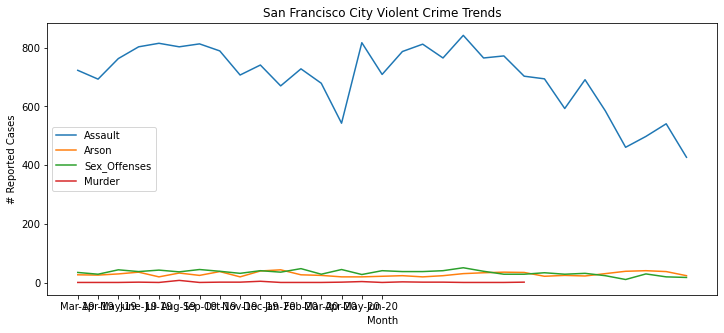

In [78]:
# Plot violent crime trends
# Step 1: Configure chart, xticks, and labels/titles
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
plt.title("San Francisco City Violent Crime Trends")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
plt.plot(list(Assault), label="Assault")
plt.plot(list(Arson), label="Arson")
plt.plot(list(Sex_Offenses), label="Sex_Offenses")
plt.plot(list(Murder), label="Murder")
plt.legend(loc="center left")
#lt.savefig("Output Folder/denviolent.png", dpi=300) 
plt.show()